 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [62]:
# Use the Pathlib libary to set the path to the CSV
whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [56]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [57]:
# Count nulls
whale_nulls = whale_returns.isnull().sum()

In [66]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [12]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [13]:
# Count nulls
algo_nulls = algo_returns.isnull().sum()

In [65]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [63]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [64]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [68]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].astype(str).str.replace("$", "", regex=True).astype("float")

In [69]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [71]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [72]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["S&P 500"]

## Combine Whale, Algorithmic, and S&P 500 Returns

In [96]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis=1)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

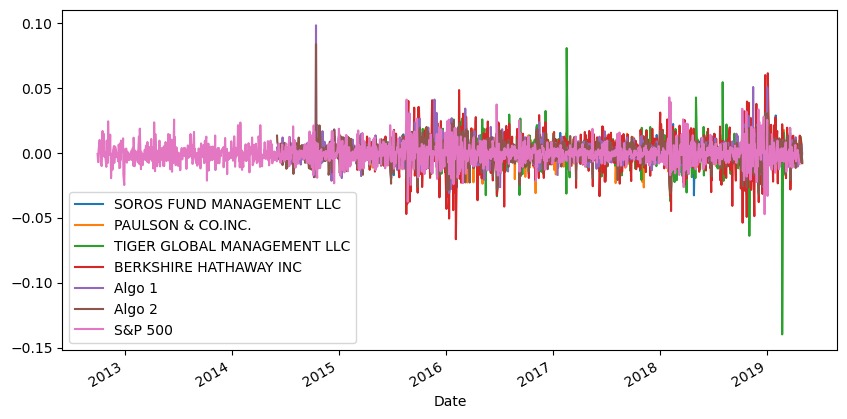

In [30]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

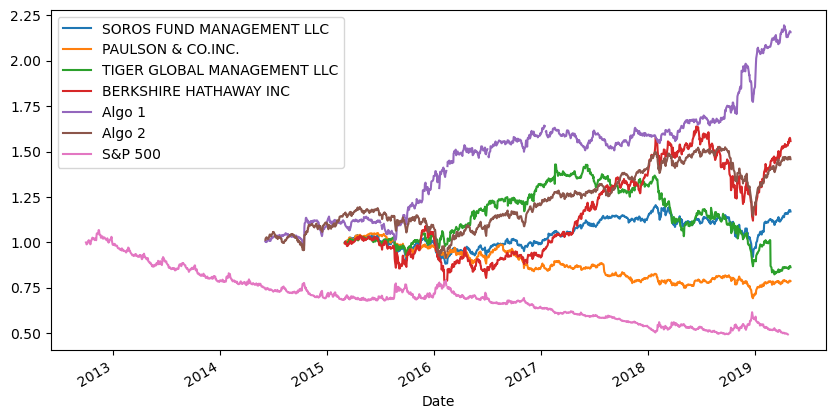

In [31]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

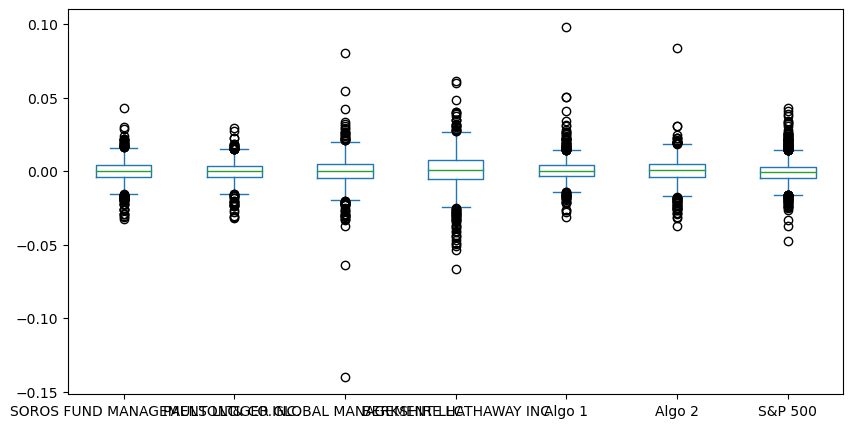

In [32]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(10,5))

### Calculate Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()

### Determine which portfolios are riskier than the S&P 500

In [34]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = combined_returns["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std[daily_std > sp500_daily_std]

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

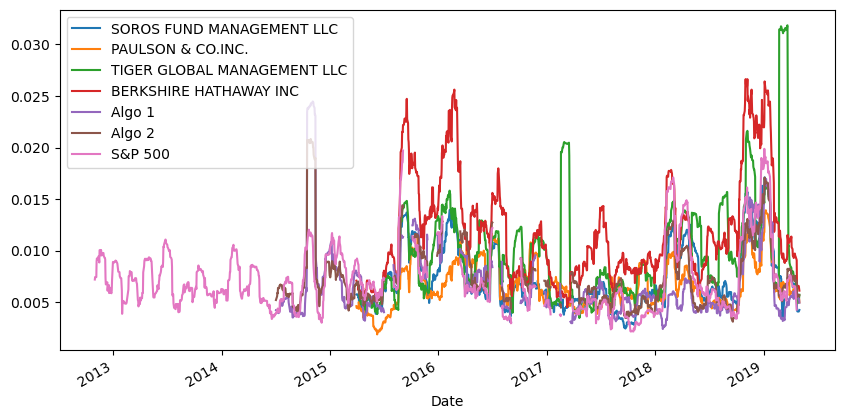

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,5))

### Calculate and plot the correlation

In [37]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
print(correlation)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.700181   
PAULSON & CO.INC.                             0.700181            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561745            0.435333   
BERKSHIRE HATHAWAY INC                        0.754308            0.545802   
Algo 1                                        0.321366            0.269257   
Algo 2                                        0.826719            0.677993   
S&P 500                                       0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561745   
PAULSON & CO.INC.                               0.435333   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.425102   
Algo 1                                          0.164840   
Algo 2         

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

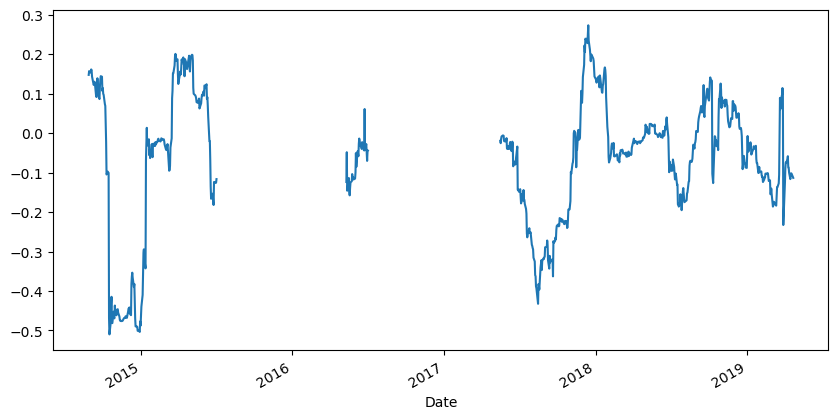

In [38]:
# Calculate covariance of a single portfolio
covariance = combined_returns["Algo 1"].rolling(window=60).cov(combined_returns["S&P 500"])

# Calculate variance of S&P 500
variance = combined_returns["S&P 500"].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(10,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [39]:
# Use `ewm` to calculate the rolling window
ewm_rolling = combined_returns.ewm(span=21).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

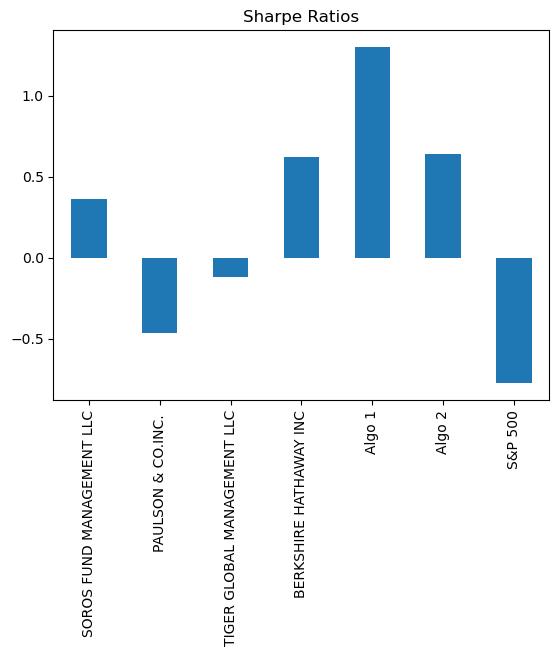

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [77]:
# Reading data from 1st stock
aapl_historical = pd.read_csv("Resources/aapl_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [78]:
# Reading data from 2nd stock
cost_historical = pd.read_csv("Resources/cost_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [79]:
# Reading data from 3rd stock
goog_historical = pd.read_csv("Resources/goog_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [80]:
# Combine all stocks in a single DataFrame
combined_stock_data = pd.concat([aapl_historical, cost_historical, goog_historical], axis=1)

In [81]:
# Reset Date index
combined_stock_data.reset_index(inplace=True)

In [84]:
# Reorganize portfolio data by having a column per symbol

# Rename columns
combined_stock_data.columns = ['Trade DATE', 'AAPL Symbol', 'AAPL NOCP', 'COST Symbol', 'COST NOCP', 'GOOG Symbol', 'GOOG NOCP']

# Keep only the 'NOCP' columns and set the date as the index
combined_stock_data = combined_stock_data[['Trade DATE', 'AAPL NOCP', 'COST NOCP', 'GOOG NOCP']]
combined_stock_data = combined_stock_data.set_index('Trade DATE')

# Rename 'NOCP' columns to their respective stock symbols
combined_stock_data.columns = ['AAPL', 'COST', 'GOOG']

In [85]:
# Calculate daily returns
stock_daily_returns = combined_stock_data.pct_change()

# Drop NAs
stock_daily_returns.dropna(inplace=True)

# Display sample data
stock_daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [86]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = stock_daily_returns.dot(weights)

# Display sample data
portfolio_return.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [87]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns["Custom"] = portfolio_return

In [88]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [89]:
# Calculate the annualized `std`
annualized_std_custom = combined_returns["Custom"].std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

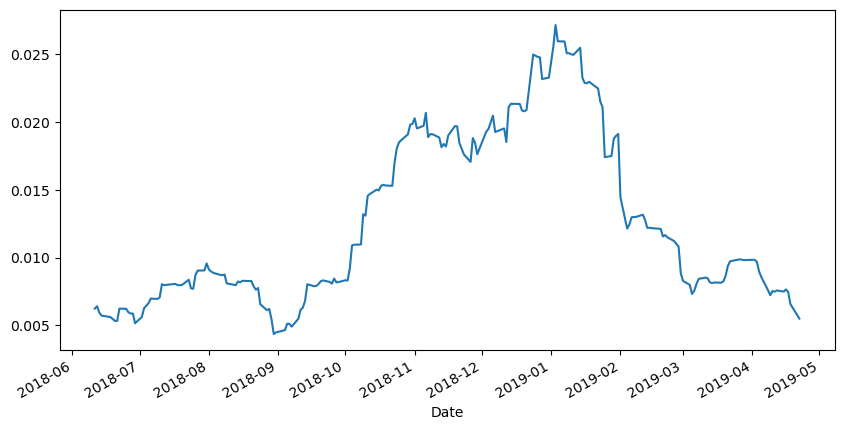

In [90]:
# Calculate rolling standard deviation
rolling_std_custom = combined_returns["Custom"].rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_custom.plot(figsize=(10,5))

### Calculate and plot the correlation

In [91]:
# Calculate and plot the correlation
correlation_custom = combined_returns.corr()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

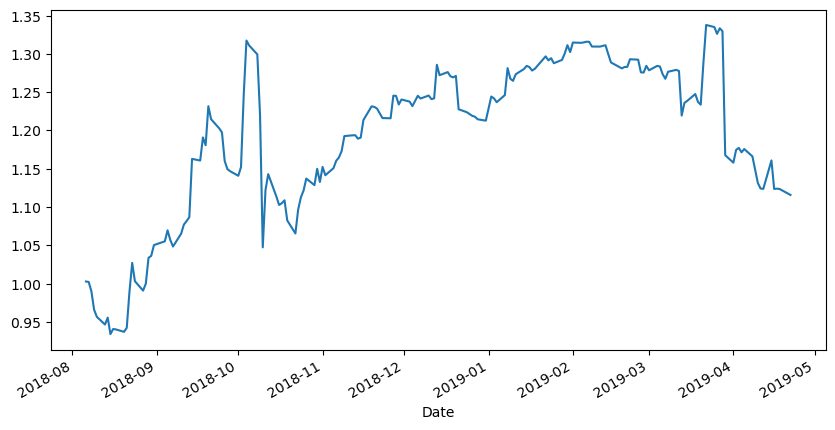

In [92]:
# Calculate and plot Beta
covariance_custom = combined_returns["Custom"].rolling(window=60).cov(combined_returns["S&P 500"])
beta_custom = covariance_custom / variance
beta_custom.plot(figsize=(10,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_custom = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios with Custom Portfolio'}>

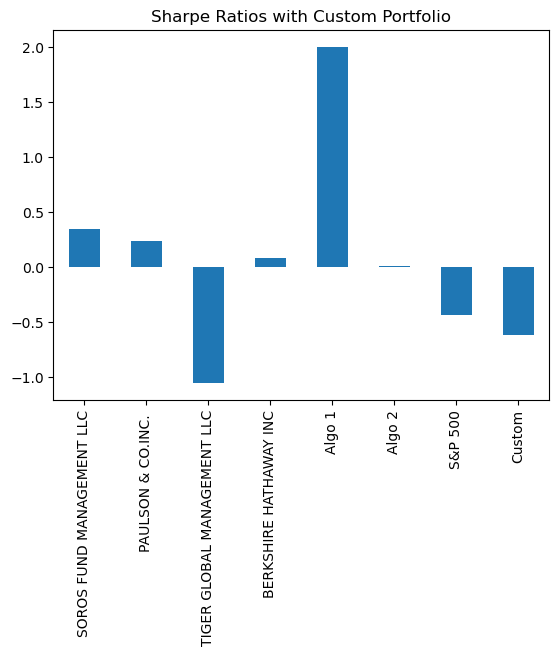

In [94]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind="bar", title="Sharpe Ratios with Custom Portfolio")

### How does your portfolio do?

Write your answer here!